/var/folders/wp/cfqw107n3gq411msnwhdvw140000gn/T/ipykernel_52608/2066305939.py:30: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax.set_xlim(0, 1000000000)


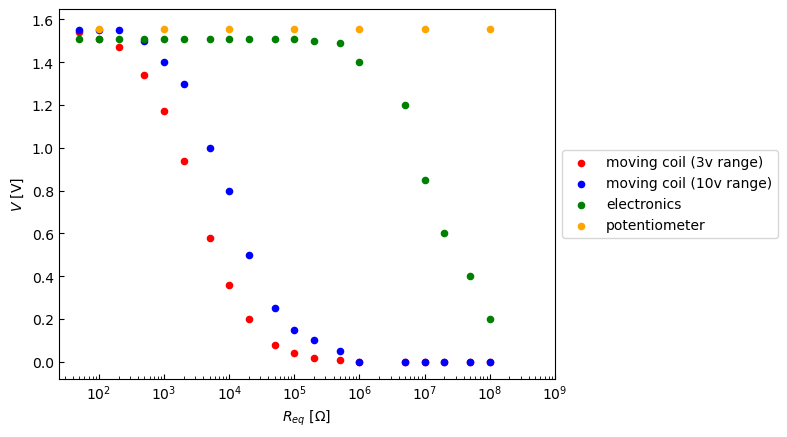

In [11]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file and store the data in a DataFrame
df1 = pd.read_excel('data.xlsx', sheet_name="可動コイル")
df2 = pd.read_excel('data.xlsx', sheet_name="エレクトロニクス")
df3 = pd.read_excel('data.xlsx', sheet_name="電位差計")
# Create a figure and axis object
fig, ax = plt.subplots()

# Set x-axis scale to logarithmic
ax.set_xscale('log')

df1.plot(x='req', y='V(3v range)', kind='scatter', ax=ax, label='moving coil (3v range)', color='red')

df1.plot(x='req', y='V(10v range)', kind='scatter', ax=ax, label='moving coil (10v range)', color='blue')

df2.plot(x='req', y='V', kind='scatter', ax=ax, label='electronics', color='green')

df3.plot(x='req', y='V', kind='scatter', ax=ax, label='potentiometer', color='orange')


# Set graph title and axis labels
ax.set_ylabel(r'$V$ [V]')
ax.set_xlabel(r'$R_{eq}$ [Ω]')

# Set y-axis range
ax.set_xlim(0, 1000000000)
# Move the y-axis tick labels to the inside of the plot area
ax.tick_params(which='both', direction='in')
# Move the legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

# Save the figure as a PDF file
fig.savefig('figs/req_vs_V.pdf', bbox_inches='tight')

/var/folders/wp/cfqw107n3gq411msnwhdvw140000gn/T/ipykernel_52608/522626839.py:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_smooth, y_smooth, 'r-', label=f'Fit (moving coil 3v range): R_m = {params[0]:.2f} Ω', color='red')
/var/folders/wp/cfqw107n3gq411msnwhdvw140000gn/T/ipykernel_52608/522626839.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_smooth, y_smooth, 'b-', label=f'Fit (moving coil 10v range): R_m = {params[0]:.2f} Ω', color='blue')
/var/folders/wp/cfqw107n3gq411msnwhdvw140000gn/T/ipykernel_52608/522626839.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(x_smooth, y_smooth, 'g-', label=f'Fit (electro

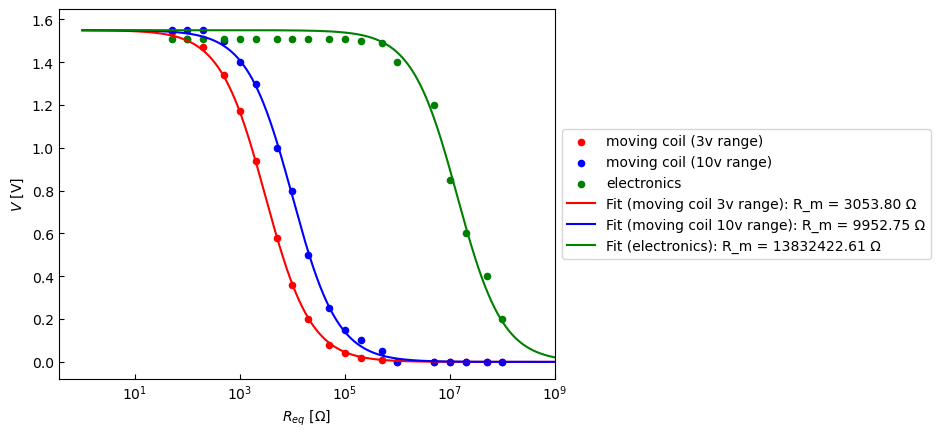

In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the Excel file and store the data in a DataFrame
df1 = pd.read_excel('data.xlsx', sheet_name="可動コイル")
df2 = pd.read_excel('data.xlsx', sheet_name="エレクトロニクス")
df3 = pd.read_excel('data.xlsx', sheet_name="電位差計")

# Define the fitting function for the curve
def fit_func(x, R_m):
    return 1.55 * R_m / (x + R_m)

# Create a figure and axis object
fig, ax = plt.subplots()

# Set x-axis scale to logarithmic
ax.set_xscale('log')

# Generate a range of x values for a smoother curve
x_smooth = np.logspace(0, 9, 1000)

# Plot the scatter data points for "moving coil (3v range)"
df1.plot(x='req', y='V(3v range)', kind='scatter', ax=ax, label='moving coil (3v range)', color='red')

# Filter out the second row of data from "V(10v range)"
df1_filtered = df1.iloc[1:]  # Exclude the second row
df1_filtered.plot(x='req', y='V(10v range)', kind='scatter', ax=ax, label='moving coil (10v range)', color='blue')

# Plot the scatter data points for "electronics"
df2.plot(x='req', y='V', kind='scatter', ax=ax, label='electronics', color='green')

# Fit the curve to the data and plot it for "moving coil (3v range)"
x_data = df1['req']
y_data = df1['V(3v range)']
params, covariance = curve_fit(fit_func, x_data, y_data)
y_smooth = fit_func(x_smooth, *params)
plt.plot(x_smooth, y_smooth, 'r-', label=f'Fit (moving coil 3v range): R_m = {params[0]:.2f} Ω', color='red')

# Fit the curve to the filtered data for "moving coil (10v range)"
x_data = df1_filtered['req']
y_data = df1_filtered['V(10v range)']
params, covariance = curve_fit(fit_func, x_data, y_data)
y_smooth = fit_func(x_smooth, *params)
plt.plot(x_smooth, y_smooth, 'b-', label=f'Fit (moving coil 10v range): R_m = {params[0]:.2f} Ω', color='blue')

# Fit the curve to the data and plot it for "electronics"
x_data = df2['req']
y_data = df2['V']
params, covariance = curve_fit(fit_func, x_data, y_data)
y_smooth = fit_func(x_smooth, *params)
plt.plot(x_smooth, y_smooth, 'g-', label=f'Fit (electronics): R_m = {params[0]:.2f} Ω', color='green')

# Set graph title and axis labels
ax.set_ylabel(r'$V$ [V]')
ax.set_xlabel(r'$R_{eq}$ [Ω]')

# Set y-axis range
ax.set_xlim(0, 1000000000)
# Move the y-axis tick labels to the inside of the plot area
ax.tick_params(which='both', direction='in')
# Move the legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

# Save the figure as a PDF file
fig.savefig('figs/req-V_fit.pdf', bbox_inches='tight')


傾き (moving coil 3v range): 0.00022373781278532939
傾き (moving coil 10v range): 4.932431922511711e-05
傾き (electronics): 3.4948138786648505e-08


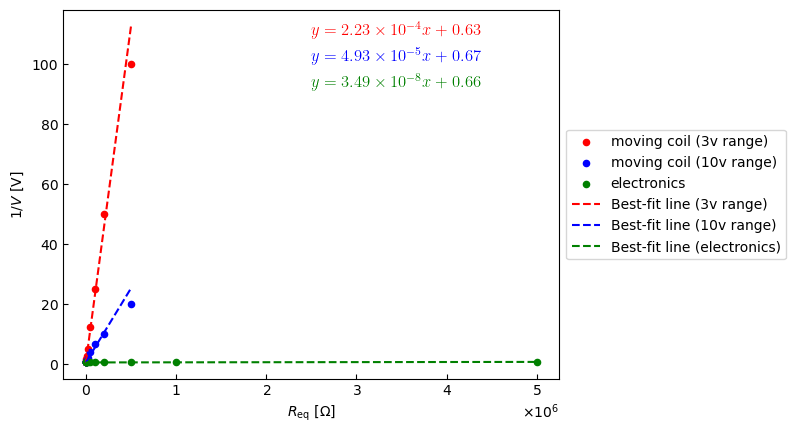

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Load the Excel file and store the data in a DataFrame
df1 = pd.read_excel('data.xlsx', sheet_name="可動コイル最小二乗法")
df2 = pd.read_excel('data.xlsx', sheet_name="エレクトロニクス")

# Create a figure and axis object
fig, ax = plt.subplots()

# Scatter plot for df1
df1.plot(x='req', y='V(3v range)', kind='scatter', ax=ax, label='moving coil (3v range)', color='red')
df1.plot(x='req', y='V(10v range)', kind='scatter', ax=ax, label='moving coil (10v range)', color='blue')

# Scatter plot for df2
df2.iloc[2:15].plot(x='req', y='1/v', kind='scatter', ax=ax, label='electronics', color='green')

# Perform weighted linear regression to get the best-fit lines
weights1 = 1 / df1['V(3v range)']  # Example: You can customize the weights based on your specific problem
weights2 = 1 / df1['V(10v range)']
weights3 = 1 / df2.iloc[2:15]['1/v']

coeffs1 = np.polyfit(df1['req'], df1['V(3v range)'], 1, w=weights1)
coeffs2 = np.polyfit(df1['req'], df1['V(10v range)'], 1, w=weights2)
coeffs3 = np.polyfit(df2.iloc[2:15]['req'], df2.iloc[2:15]['1/v'], 1, w=weights3)

# Display the slopes of the best-fit lines
print("傾き (moving coil 3v range):", coeffs1[0])
print("傾き (moving coil 10v range):", coeffs2[0])
print("傾き (electronics):", coeffs3[0])

# Create the best-fit lines using the obtained coefficients
line1 = coeffs1[0] * df1['req'] + coeffs1[1]
line2 = coeffs2[0] * df1['req'] + coeffs2[1]
line3 = coeffs3[0] * df2.iloc[2:15]['req'] + coeffs3[1]

# Plot the best-fit lines
ax.plot(df1['req'], line1, color='red', linestyle='--', label='Best-fit line (3v range)')
ax.plot(df1['req'], line2, color='blue', linestyle='--', label='Best-fit line (10v range)')
ax.plot(df2.iloc[2:15]['req'], line3, color='green', linestyle='--', label='Best-fit line (electronics)')

# Position the equation text near the lines
ax.text(0.5, 0.93, r'$y = 2.23\times 10^{-4}x + 0.63$', transform=ax.transAxes, color='red', usetex=True, fontsize=12)
ax.text(0.5, 0.86, r'$y = 4.93\times 10^{-5}x + 0.67$', transform=ax.transAxes, color='blue', usetex=True, fontsize=12)
ax.text(0.5, 0.79, r'$y = 3.49\times 10^{-8}x + 0.66$', transform=ax.transAxes, color='green', usetex=True, fontsize=12)

# Set graph title and axis labels
ax.set_xlabel(r'$R_{\mathrm{eq}}$ [Ω]')
ax.set_ylabel('$1/V$ [V]')

# Customize the req axis to display in 10's power format
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)

# Move the y-axis tick labels to the inside of the plot area
ax.tick_params(which='both', direction='in')

# Move the legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

# Save the figure as a PDF file
fig.savefig('figs/req_vs_V_with_fit_lines.pdf', bbox_inches='tight')


NameError: name 'your_error_values_for_3v_range' is not defined

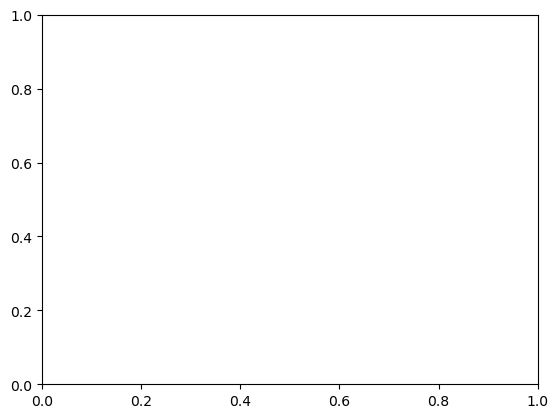

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Load the Excel file and store the data in a DataFrame
df1 = pd.read_excel('data.xlsx', sheet_name="可動コイル最小二乗法")
df2 = pd.read_excel('data.xlsx', sheet_name="エレクトロニクス")

# Create a figure and axis object
fig, ax = plt.subplots()

# Scatter plot for df1 with error bars
ax.errorbar(df1['req'], df1['V(3v range)'], yerr=your_error_values_for_3v_range, fmt='o', label='moving coil (3v range)', color='red')
ax.errorbar(df1['req'], df1['V(10v range)'], yerr=your_error_values_for_10v_range, fmt='o', label='moving coil (10v range)', color='blue')

# Scatter plot for df2 with error bars
ax.errorbar(df2.iloc[2:15]['req'], df2.iloc[2:15]['1/v'], yerr=your_error_values_for_electronics, fmt='o', label='electronics', color='green')

# Perform weighted linear regression to get the best-fit lines
weights1 = 1 / df1['V(3v range)']  # Example: You can customize the weights based on your specific problem
weights2 = 1 / df1['V(10v range)']
weights3 = 1 / df2.iloc[2:15]['1/v']

coeffs1 = np.polyfit(df1['req'], df1['V(3v range)'], 1, w=weights1)
coeffs2 = np.polyfit(df1['req'], df1['V(10v range)'], 1, w=weights2)
coeffs3 = np.polyfit(df2.iloc[2:15]['req'], df2.iloc[2:15]['1/v'], 1, w=weights3)

# Display the slopes of the best-fit lines
print("傾き (moving coil 3v range):", coeffs1[0])
print("傾き (moving coil 10v range):", coeffs2[0])
print("傾き (electronics):", coeffs3[0])

# Create the best-fit lines using the obtained coefficients
line1 = coeffs1[0] * df1['req'] + coeffs1[1]
line2 = coeffs2[0] * df1['req'] + coeffs2[1]
line3 = coeffs3[0] * df2.iloc[2:15]['req'] + coeffs3[1]

# Plot the best-fit lines
ax.plot(df1['req'], line1, color='red', linestyle='--', label='Best-fit line (3v range)')
ax.plot(df1['req'], line2, color='blue', linestyle='--', label='Best-fit line (10v range)')
ax.plot(df2.iloc[2:15]['req'], line3, color='green', linestyle='--', label='Best-fit line (electronics)')

# Position the equation text near the lines
ax.text(0.5, 0.93, r'$y = 2.23\times 10^{-4}x + 0.63$', transform=ax.transAxes, color='red', usetex=True, fontsize=12)
ax.text(0.5, 0.86, r'$y = 4.93\times 10^{-5}x + 0.67$', transform=ax.transAxes, color='blue', usetex=True, fontsize=12)
ax.text(0.5, 0.79, r'$y = 3.49\times 10^{-8}x + 0.66$', transform=ax.transAxes, color='green', usetex=True, fontsize=12)

# Set graph title and axis labels
ax.set_xlabel(r'$R_{\mathrm{eq}}$ [Ω]')
ax.set_ylabel('$1/V$ [V]')

# Customize the req axis to display in 10's power format
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0), useMathText=True)

# Move the y-axis tick labels to the inside of the plot area
ax.tick_params(which='both', direction='in')

# Move the legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

# Save the figure as a PDF file
fig.savefig('figs/req_vs_V_with_fit_lines_and_error_bars.pdf', bbox_inches='tight')


Moving Coil (3V range) の交点: 3374.9999999999973
Moving Coil (10V range) の交点: 11749.999999999993
Electronics の交点: 12999999.999999998


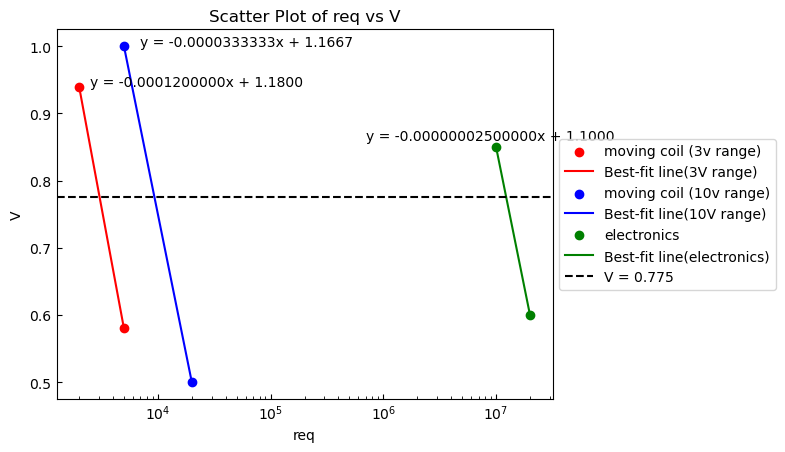

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file and store the data in a DataFrame
df1 = pd.read_excel('data.xlsx', sheet_name="可動コイル")
df2 = pd.read_excel('data.xlsx', sheet_name="エレクトロニクス")
df3 = pd.read_excel('data.xlsx', sheet_name="電位差計")

# Create a figure and axis object
fig, ax = plt.subplots()

# Set x-axis scale to logarithmic
ax.set_xscale('log')

# Fit a straight line to the data for df1.iloc[6:8]
x = df1.iloc[6:8]['req']
y = df1.iloc[6:8]['V(3v range)']
coeffs = np.polyfit(x, y, 1)
line = np.poly1d(coeffs)(x)

# Plot the scatter plot for df1.iloc[6:8] and display the equation
ax.scatter(x, y, label='moving coil (3v range)', color='red')
ax.plot(x, line, color='red', label='Best-fit line(3V range)')
equation = f'y = {coeffs[0]:.10f}x + {coeffs[1]:.4f}'
ax.text(2500, y.max(), equation, fontsize=10, color='black')

# Calculate the intersection with y = 0.775 for df1.iloc[6:8]
intersection_3v_range = (0.775 - coeffs[1]) / coeffs[0]
print("Moving Coil (3V range) の交点:", intersection_3v_range)

# Fit a straight line to the data for df1.iloc[7:10]
x = df1.iloc[[7, 9]]['req']
y = df1.iloc[[7, 9]]['V(10v range)']
coeffs = np.polyfit(x, y, 1)
line = np.poly1d(coeffs)(x)

# Plot the scatter plot for df1.iloc[7:10] and display the equation
ax.scatter(x, y, label='moving coil (10v range)', color='blue')
ax.plot(x, line, color='blue', label='Best-fit line(10V range)')
equation = f'y = {coeffs[0]:.10f}x + {coeffs[1]:.4f}'
ax.text(7000, y.max(), equation, fontsize=10, color='black')

# Calculate the intersection with y = 0.775 for df1.iloc[7:10]
intersection_10v_range = (0.775 - coeffs[1]) / coeffs[0]
print("Moving Coil (10V range) の交点:", intersection_10v_range)

# Fit a straight line to the data for df2.iloc[[14, 16, 17]]
x = df2.iloc[[15, 16]]['req']
y = df2.iloc[[15, 16]]['V']
coeffs = np.polyfit(x, y, 1)
line = np.poly1d(coeffs)(x)

# Plot the scatter plot for df2.iloc[[14, 16, 17]] and display the equation
ax.scatter(x, y, label='electronics', color='green')
ax.plot(x, line, color='green', label='Best-fit line(electronics)')
equation = f'y = {coeffs[0]:.14f}x + {coeffs[1]:.4f}'
ax.text(700000, 0.86, equation, fontsize=10, color='black')

# Calculate the intersection with y = 0.775 for df2.iloc[[14, 16, 17]]
intersection_electronics = (0.775 - coeffs[1]) / coeffs[0]
print("Electronics の交点:", intersection_electronics)

# Add a horizontal line at y=0.775
ax.axhline(y=0.775, color='black', linestyle='--', label='V = 0.775')

# Set graph title and axis labels
ax.set_title('Scatter Plot of req vs V')
ax.set_xlabel('req')
ax.set_ylabel('V')

# Move the y-axis tick labels to the inside of the plot area
ax.tick_params(which='both', direction='in')

# Move the legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


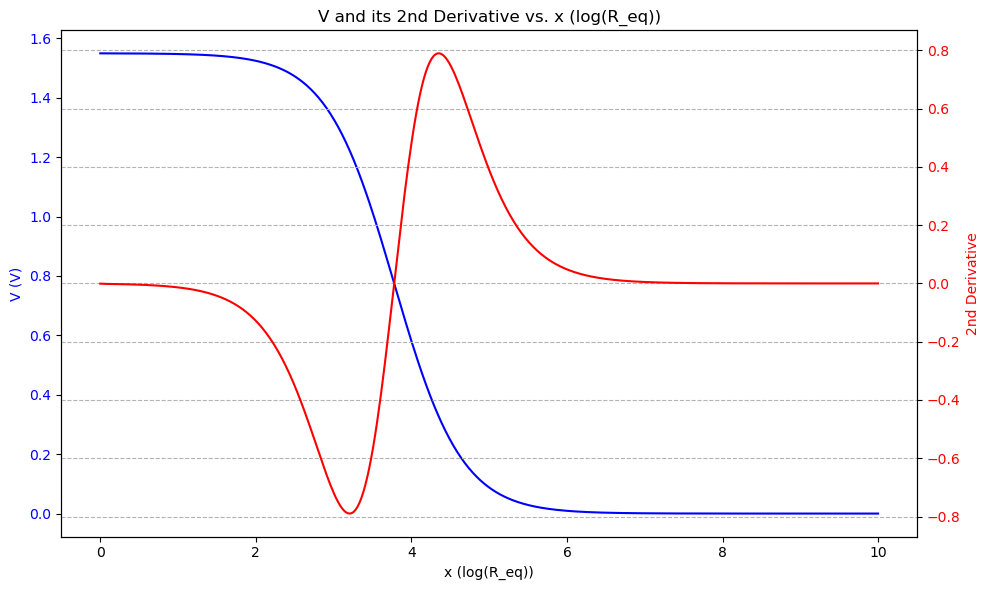

xの範囲 (4 <= x <= 6) で2nd Derivativeが0になるR_eqの値: [5746.43496872]


In [92]:
import numpy as np
import matplotlib.pyplot as plt

# 定数の設定
E_eq = 1.55
R_m = 6000

# x = log(R_eq)としてxの範囲を設定
x_values = np.linspace(0, 10, 400)  # 1から10^6までの対数スケール
R_eq_values = 10**x_values

# Vの計算
V_values = (R_m * E_eq) / (R_m + R_eq_values)

# 2階微分を計算
V_prime = np.gradient(V_values, x_values)
V_double_prime = np.gradient(V_prime, x_values)

# グラフの描画
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_xlabel('x (log(R_eq))')
ax1.set_ylabel('V (V)', color='blue')
ax1.plot(x_values, V_values, color='blue', label='V vs. x')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('2nd Derivative', color='red')
ax2.plot(x_values, V_double_prime, color='red', label='2nd Derivative of V')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('V and its 2nd Derivative vs. x (log(R_eq))')
plt.grid(True, which="both", ls="--", c='0.7')
plt.tight_layout()
plt.show()

# xが4から6の範囲で2nd Derivativeが0になるxの値を計算
x_range = np.where((x_values >= 3) & (x_values <= 6))
x_zeros = x_values[x_range][np.where(np.diff(np.sign(V_double_prime[x_range])))[0]]
R_eq_zeros = 10**x_zeros

# 結果を表示
print("xの範囲 (4 <= x <= 6) で2nd Derivativeが0になるR_eqの値:", R_eq_zeros)


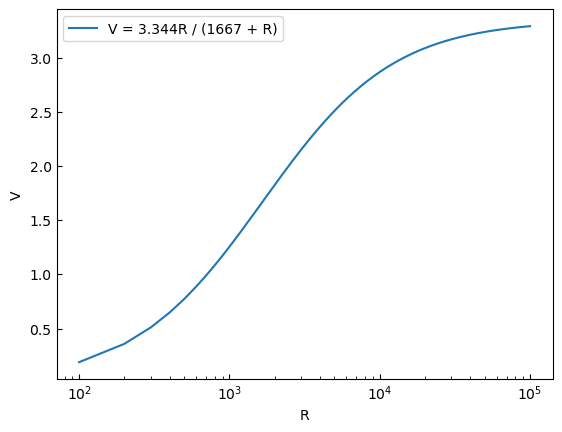

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# Rの値の範囲を100から100000までに定義
R = np.linspace(100, 100000, 1000)

# Vの値を計算
V = 3.344 * R / (1667 + R)

# グラフを描画
fig, ax = plt.subplots()  # axオブジェクトを作成
ax.plot(R, V, label='V = 3.344R / (1667 + R)')
ax.set_xlabel('R')
ax.set_ylabel('V')
ax.set_xscale('log')  # R軸を対数スケールで表示
ax.legend()
ax.tick_params(which='both', direction='in')  # tick_paramsをaxオブジェクトに対して呼び出す
plt.show()


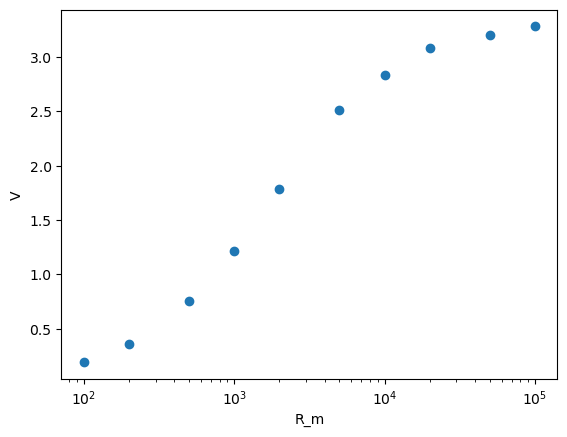

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file and store the data in a DataFrame
df = pd.read_excel('data.xlsx', sheet_name='テブナン')

# Create a scatter plot of R_m vs. V
fig, ax = plt.subplots()
ax.scatter(df['R_m'], df['V'])
ax.set_xlabel('R_m')
ax.set_ylabel('V')
ax.set_xscale('log')


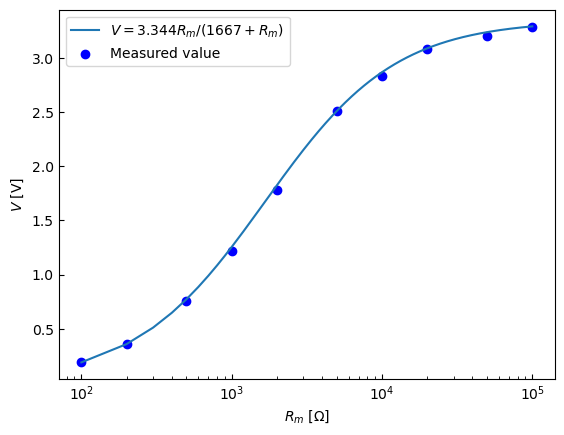

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Rの値の範囲を100から100000までに定義
R = np.linspace(100, 100000, 1000)

# Vの値を計算
V = 3.344 * R / (1667 + R)

# Load the Excel file and store the data in a DataFrame
df = pd.read_excel('data.xlsx', sheet_name='テブナン')

# グラフを描画
fig, ax = plt.subplots()  # axオブジェクトを作成

# Plot the V-R curve
ax.plot(R, V, label='$V = 3.344R_m / (1667 + R_m)$')

# Add the scatter plot of R_m vs. V from the Excel data
ax.scatter(df['R_m'], df['V'], color='blue', label='Measured value')

ax.set_xlabel('$R_m$ [Ω]')
ax.set_ylabel('$V$ [V]')
ax.set_xscale('log')  # R軸を対数スケールで表示
ax.legend()
ax.tick_params(which='both', direction='in')  # tick_paramsをaxオブジェクトに対して呼び出す
plt.show()

fig.savefig('figs/tebunan.pdf', bbox_inches='tight')
